##Twitter Retweet & Mention networks

In this assignment, you are to use the Twitter API to do a search for tweets containing a hashtag, then produce retweet and mention networks of the conversation. You are encouraged to reuse code from past tutorials to help you with these exercises.

The parts of this assignment build on themselves -- you *really* don't want to get stuck early on here. Please get started early and don't be afraid to ask for help.

## A note about notebook cells

Beneath each exercise description there is a single code cell. This is not to suggest that you should do all your work in a single cell. Please create as many as you need via the "Insert" menu in the notebook menu bar.

Another thing worth noting (as I mentioned in class) the Twitter API is rate limited, so it's worth making your API call in a seperate cell from the code you write to manipulate the result. That will avoid having the API call repeat every time you run the cell as you're debugging. 

# Exercise: Retweet network

Here we want to produce a **directed** graph of users **retweeting** each others' tweets.

(Note - please read this overview of the assignment before diving in - it might be helpful to have a firm idea of each required step before you start) 

* 1.) Do a search for a hashtag of your choosing, and retrieve at least 1000 tweets. Show that you have at least 1000 tweets.

* 2.) For each tweet, if the tweet is a retweet, add an edge **from the *retweeted* user to the *retweeting* user**.

* 3.) Remove selfloop edges and then also subsequently remove singleton nodes. We didn't remove singletons in the tutorial or last assignment, but you should do it here. Your graph should only contain nodes retweeting/retweeted by at least one other user.

* 4.) Show how many nodes and edges are in this network.

* 5.) Show the screen name of the user with:
  * highest in-degree
  * highest out-degree
   
  Also provide each of these degree values.

* 6.) Draw this network

* 6.1.) (Extra Credit!) Draw network two more times - first with nodes sized according to in-degree, and then with nodes sized according to out-degree

* 7.) In the context of Twitter and Twitter users, what does it mean for a user to be a hub with high retweet in-degree? What does it mean for a user to have high retweet out-degree?

* 8.) What proportion of the nodes in this network are *sinks* (i.e. nodes with zero out-degree)?

* 8.1) What does it mean for a user to be a sink in this network?

* 9.) What proportion of the nodes in this network are *sources* (i.e. nodes with zero in-degree)? 

* 9.1) What does it mean for a user to be a source in this network?

* 10.) (Extra Credit!) What proportion of the nodes in this network are in its largest weakly-connected component?

If the network doesn't have very many edges, (use your best judgement) try again but with more tweets, e.g. 2000 instead of 1000 - or a different hashtag. 

NOTES WK 12 D2:

If edges goes 
Retweeted user —> retweeting user 
(retweeted user gives info to retweeting user)

If edges are other way —
Retweeting user —> retweeted user 
(retweeting user is giving attention to the original tweet)


In [ ]:
!pip install --upgrade twarc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 4.5 MB/s 
     |████████████████████████████████| 106 kB 21.2 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=76e2c1e5fb858000a6410fb2c4e5997c75da23b4aae7163bd5139c152357b6af
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
  Attempting uninstall: humanize
    Found existing installation: humanize 0.5.1
    Uninstalling humanize-0.5.1:
      Successfully uninstalled humanize-0.5.1


In [ ]:
# IMPORTING CLIENTS
import networkx as nx
from twarc.client2 import Twarc2
from twarc.expansions import flatten
from operator import itemgetter

In [ ]:
#GAINING ACCESS
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAM5cjAEAAAAAKatM2bRpcEqhZPYQ1%2FgNaAbvPYg%3DkRcyvpl4PbbQOIUiTxP6OO3jrxaP1g67A6bmNK6KAORBY85MDf'
client = Twarc2(bearer_token=bearer_token)

In [ ]:
# PRETTY PRINT JSON OBJ
from pprint import pprint

## Exericse 1. Do a search for a hashtag of your choosing, and retrieve at least 1000 tweets. Show that you have at least 1000 tweets. 

In [ ]:
#GATHERING TWEETS BY A HASHTAG
pages = client.search_recent('#HTTC')

search_tweets=[]

for page in pages:
  search_tweets += flatten(page) 
  if len(search_tweets) >= 1000:
    break

In [ ]:
#PRINT THE NUMBER OF TWEETS GATHERED
print(len(search_tweets))

1000


## 2. For each tweet, if the tweet is a retweet, add an edge **from the *retweeted* user to the *retweeting* user**.


In [ ]:
#CREATE NETWORK
#LINKS FROM RETWEETED USER TO RETWEETING USER
# RETWEETED USER -> RETWEETER USER

D = nx.DiGraph()
for tweet in search_tweets:
  if 'referenced_tweets' in tweet:
    for ref_tweet in tweet['referenced_tweets']:
      if ref_tweet['type'] == 'retweeted':
        retweeter_user = tweet['author']['username']
        retweeted_user = ref_tweet['author']['username']
        if D.has_edge(retweeted_user, retweeter_user):
          D.edges[retweeted_user, retweeter_user]['weight'] += 1
        else:
          D.add_edge(retweeted_user, retweeter_user, weight=1)

print(f"The retweet network has {D.number_of_nodes()} nodes and {D.number_of_edges()} edges.")

The retweet network has 441 nodes and 493 edges.


## 3. Remove selfloop edges and then also subsequently remove singleton nodes. We didn't remove singletons in the tutorial, but you should do it here. Your graph should only contain nodes retweeting/retweeted by at least one other user.


In [ ]:
#REMOVE SELF LOOPS
self_loop_list = []
for edge in D.edges():
  if edge[0] == edge[1]:
    self_loop_list.append(edge)

#PRINT NUM SELF LOOPS
#print(len(self_loop_list))

#REMOVING SELF LOOPS
D.remove_edges_from(self_loop_list)

#CHECK IF HAS SELF LOOPS
#self_loop_list.clear()
#for edge in D.edges():
#  if edge[0] == edge[1]:
#    self_loop_list.append(edge)
#print(len(self_loop_list))

In [ ]:
#REMOVE SINGLETON NODES
singletons_list = []
for n in D.nodes():
   neighbors = [D.successors(n)]
   neighbors.append(D.predecessors(n))
   #print(len(neighbors))
   if len(neighbors) == 0:
     singletons_list.append(n)

D.remove_nodes_from(singletons_list)
#print(singletons_list)

## 4. Show how many nodes and edges are in this network.


In [ ]:
print("NUMBER OF NODES IN NETWORK: ",D.number_of_nodes())
print("NUMBER OF EDGES IN NETWORK: ",D.number_of_edges())

NUMBER OF NODES IN NETWORK:  441
NUMBER OF EDGES IN NETWORK:  483


## 5. Show the screen name of the user with:
  * highest in-degree
  * highest out-degree
   
  Also provide each of these degree values - print this information out in a easily readable format - as demonstrated in the tutorial. 


In [ ]:
#HIGHEST IN DEGREE
top_5 = sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]
print(f"USER WITH HIGHEST IN DEGREE: {top_5[0][0]} WITH IN-DEGREE OF {top_5[0][1]}")

print("\nTOP 5 HIGHEST IN DEGREE:")
for i in range(0,5):
  print(f"{i+1}) USER: {top_5[i][0]} HAS IN-DEGREE OF {top_5[i][1]}")

USER WITH HIGHEST IN DEGREE: IceColdNattyBoh WITH IN-DEGREE OF 7

TOP 5 HIGHEST IN DEGREE:
1) USER: IceColdNattyBoh HAS IN-DEGREE OF 7
2) USER: Itswizskins HAS IN-DEGREE OF 5
3) USER: Wehavenochance HAS IN-DEGREE OF 5
4) USER: CommiesParade HAS IN-DEGREE OF 5
5) USER: ScottJenningsHH HAS IN-DEGREE OF 4


## 6. Draw this network




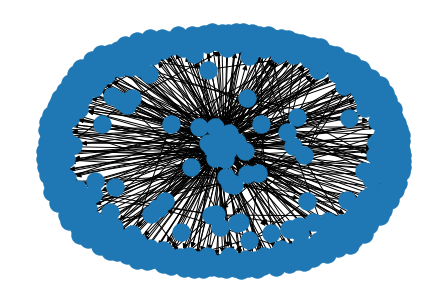

In [ ]:
nx.draw(D)

## 6.1 (Extra credit!) 

Draw the network two more times - first with nodes sized by in-degree, and then with nodes sized by out-degree. 

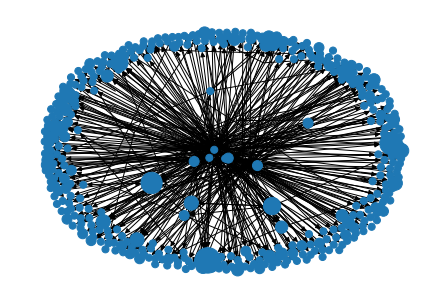

In [ ]:
# Nodes sized by in-degree
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

nx.draw(D, node_size=node_sizes)

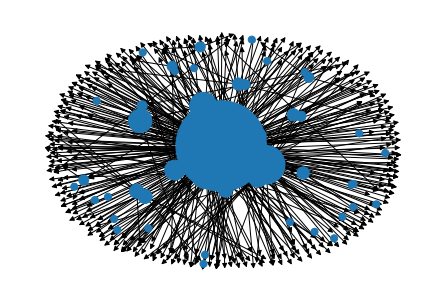

In [ ]:
# Nodes sized by out-degree
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

nx.draw(D, node_size=node_sizes)

## 7. In the context of Twitter and Twitter users, what does it mean for a user to be a hub with high retweet in-degree? What does it mean for a user to have high retweet out-degree?


## 8. What proportion of the nodes in this network are *sinks* (i.e. nodes with zero out-degree)? 
 

In [ ]:
sink_count =0
for n in D.nodes():
  if D.out_degree(n) == 0:
    sink_count=sink_count+1

print(f"{sink_count} OF {D.number_of_nodes()} NODES ARE SINKS (ZERO OUT-DEGREE)\nPROPORTION = {sink_count/D.number_of_nodes()}")

374 OF 441 NODES ARE SINKS (ZERO OUT-DEGREE)
PROPORTION = 0.8480725623582767


## 8.1 What does it mean for a user to be a sink in this network? 

When a user is a sink (has out-degree of zero) it means no one has retweeted their tweet. 

This is because we only have edges from the retweeted user to the retweeting user. (Retweeted user —> retweeting user)

## 9. What proportion of the nodes in this network are *sources* (i.e. nodes with zero in-degree)? 

In [ ]:
source_count =0
for n in D.nodes():
  if D.in_degree(n) == 0:
    source_count=source_count+1

print(f"{source_count} OF {D.number_of_nodes()} NODES ARE SOURCES (ZERO OUT-DEGREE)\nPROPORTION = {source_count/D.number_of_nodes()}")

53 OF 441 NODES ARE SOURCES (ZERO OUT-DEGREE)
PROPORTION = 0.12018140589569161


## 9.1 What does it mean for a user to be a source in this network?

When a user is a source (has in-degree of zero) it means they wrote the tweet and no one has retweeted their tweet.

This is because we only have edges from the users that have been retweeted  to the retweeting user. (Retweeted user —> retweeting user)

## 10. (Extra Credit!)  What proportion of the nodes in this network are in its largest weakly-connected component?

In [ ]:
#print(nx.number_weakly_connected_components(D))
dict_cc = {}
for w in nx.weakly_connected_components(D):
  dict_cc[len(w)] = w
  #print(len(w))

largest_cc = max(list(dict_cc.keys()))
print(f"LARGEST CONNECTED COMPOMPONENT INCLUDES {largest_cc} NODES")
print("THE CONNECTED COMPONENT IS: ", dict_cc[largest_cc])

LARGEST CONNECTED COMPOMPONENT INCLUDES 374 NODES
THE CONNECTED COMPONENT IS:  {'EstCommand', 'StewartSmall20', 'Alex_2136', 'ingarnacio', 'KeithKhorton', 'pieful35', 'DC__MOVERS', 'simbamoe1', 'cs_redsox', 'SUPERHOGS', 'MahGill', 'KingOvFreaks', 'WAHOORA', 'RatedRAustin_', 'CRF4Dan', 'caroline2041984', 'Smith4Gm', 'ohmyvanna_', 'chasesburnerac1', 'MichaelJBenelli', 'Lil__Eddie30', 'RMORTON_', 'avbanig', 'RobinLuvsDisney', 'WallyGroove', '_TylerDunlap', 'JeffreyTYost1', 'PigskinPapers', 'porter711', 'PettyWakandan', 'rudedogreyes', 'StarStudmuffin', 'WentzDotSonUp', 'warrendadogg', 'dborras', 'BluCollar_Guy', '_ReneIbarra', 'LordKirby', 'Travis23m', 'PaulJoh85777982', 'Ghaught21', '_mattschoen_', 'IceColdNattyBoh', 'OuiCh3f', 'ayeejaylan', 'UnfilteredFanz', 'DistrictDivided', '1340AMFOXSports', 'JDChrisp', '5FNSD5N1', 'abickford68', 'DeclassifiedWft', 'realfantasytl', 'TimothySeiler7', 'Sleazy1DB', 'MistiBowman', 'redzoneinthelab', 'Jlev28', 'MzzRaRa', 'SteveLim_DC', 'Downtown_Dkown', 

# **Before submitting:**

1.   At the top, click the file name and prefix "*yourlastname_*" in front
2.   Download your completed file (Do not use the 'Upload from Google Drive' option in Canvas)
3.   *Reupload your completed file and re-run it, to make sure everything is working as expected.*